In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
llm_perf_filtered_df = pd.read_csv('./data/llm_perf_filtered.csv', index_col=0).reset_index(drop=True)

In [3]:
llm_perf_filtered_df.head()

,model,throughput,response_length,latency,energy,gpu,task,parameters_count,energy_per_token,dtype,optimization,quantization,cuda-fp16
0,EleutherAI/gpt-neox-20b,27.4,256,9.34,3013.632,NVIDIA A100-SXM4-80GB,chat,20.0,0.00327,float16,NaN,gptq-4bit+exllama-v1,False
1,EleutherAI/pythia-12b,36.6,256,6.99,2101.248,NVIDIA A100-SXM4-80GB,chat,12.0,0.00228,float16,NaN,gptq-4bit+exllama-v1,False
2,EleutherAI/pythia-12b-deduped,36.6,256,7.00,2082.816,NVIDIA A100-SXM4-80GB,chat,12.0,0.00226,float16,NaN,gptq-4bit+exllama-v1,False
3,EleutherAI/polyglot-ko-12.8b,33.4,256,7.67,2313.216,NVIDIA A100-SXM4-80GB,chat,12.8,0.00251,float16,NaN,gptq-4bit+exllama-v1,False
4,DevaMalla/llama-base-7b,39.1,256,6.54,1815.552,NVIDIA A100-SXM4-80GB,chat,7.0,0.00197,float16,NaN,gptq-4bit+exllama-v1,False


In [4]:
x_range = np.array([
    llm_perf_filtered_df['parameters_count'].min(),
    llm_perf_filtered_df['parameters_count'].max()
]).reshape(-1, 1)

x = llm_perf_filtered_df['parameters_count']
y = llm_perf_filtered_df['energy_per_token']

poly = PolynomialFeatures(degree=1)
X = np.array(x).reshape(-1, 1)
poly.fit(X)
X_poly = poly.transform(X)
x_range_poly = poly.transform(x_range)
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)
y_range_poly = model.predict(x_range_poly)

print(f'Coef and intercept for A100: {model.coef_[1]}, {model.intercept_}')

Coef and intercept for A100: 8.910917097396767e-05, 0.0014387038181038396


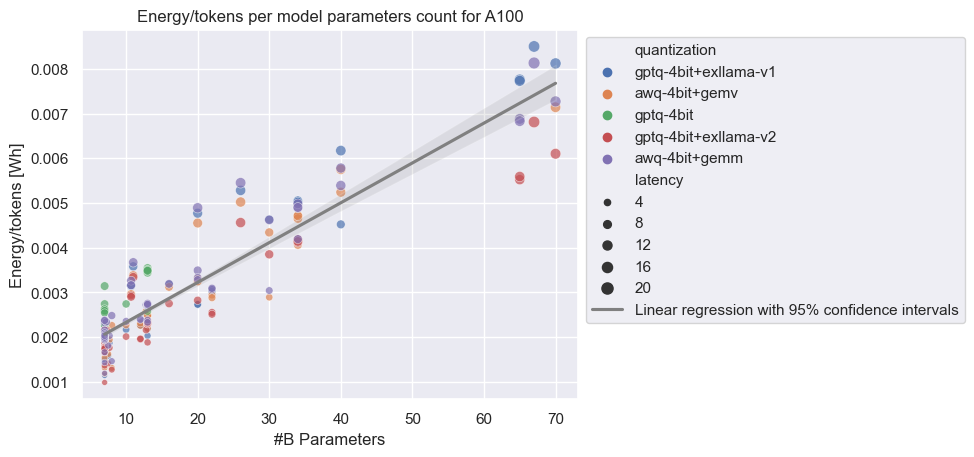

In [8]:
sns.set_theme(style='darkgrid')

sns.scatterplot(
    data=llm_perf_filtered_df, 
    x='parameters_count', 
    y='energy_per_token', 
    hue='quantization',
    size='latency',
    alpha=0.7
)

sns.regplot(
    data=llm_perf_filtered_df, 
    x='parameters_count', 
    y='energy_per_token',
    scatter=False,
    color='grey',
    label='Linear regression with 95% confidence intervals'
)

plt.title('Energy/tokens per model parameters count for A100')
plt.xlabel('#B Parameters')
plt.ylabel('Energy/tokens [Wh]')

plt.legend(bbox_to_anchor=(1, 1));